# Testing qipQST

In [131]:
%load_ext autoreload

%autoreload 2
import qipQST as qst
import numpy as np

import matplotlib.pyplot as plt

plt.style.use('dark_background')
plt.style.use('default')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [132]:
gateX = qst.PiO2X()
gateY = qst.PiO2Y()
print(gateX.getMatrix())
print(gateY.getMatrix())

[[0.7066+0.j     0.    -0.7077j]
 [0.    -0.7077j 0.7066+0.j    ]]
[[ 0.7066-0.j -0.7077-0.j]
 [ 0.7077-0.j  0.7066-0.j]]


In [133]:
tau = 0.5
guess = 0

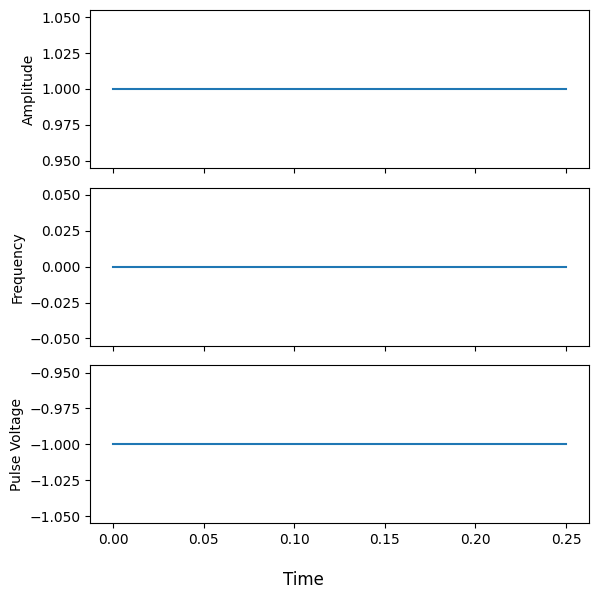

In [134]:
ramseyCircuit = qst.QuantumCircuit(guess)
ramseyCircuit.appendGate(qst.PiO2X())
#ramseyCircuit.appendGate(qst.IdleGate(tau))
#ramseyCircuit.appendGate(qst.PiO2Y())
ramseyCircuit.plotCircuitWaveform()

In [135]:
testSimulator = qst.PulseSimulator()
testSimulator.setQubit(qst.Qubit(0))
testSimulator.setCircuit(ramseyCircuit)
testSimulator.setTimeSteps(1, 10000)

In [ ]:
testResult = testSimulator.simulateCircuit(1, 10000)

In [ ]:
#%matplotlib qt
#testResult.plotBloch()

[0.5-0.5j 0.5+0.5j]
[ 1.00000000e+00+0.j -3.71924713e-15+0.j]
[0.70710678+0.j         0.        -0.70710678j]
0.4999999999995543


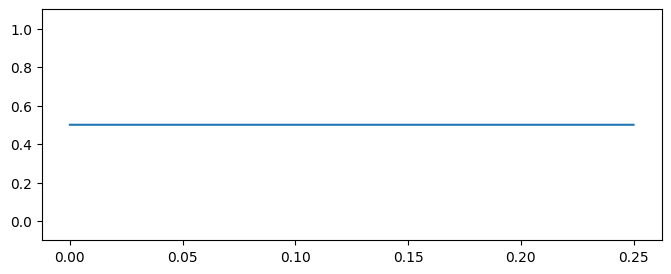

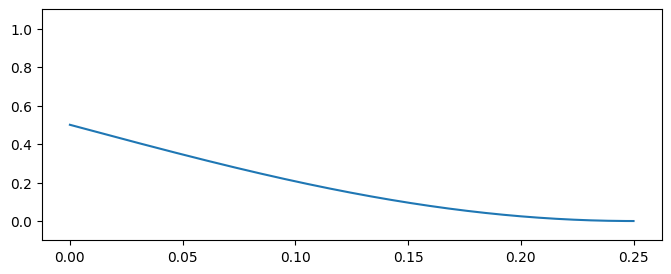

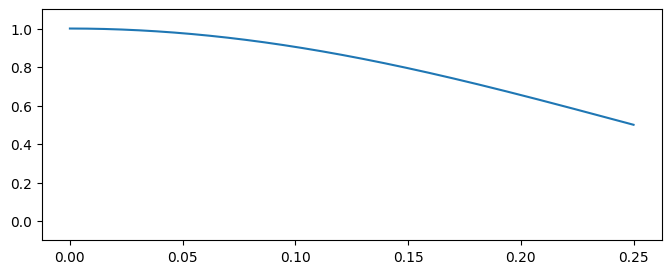

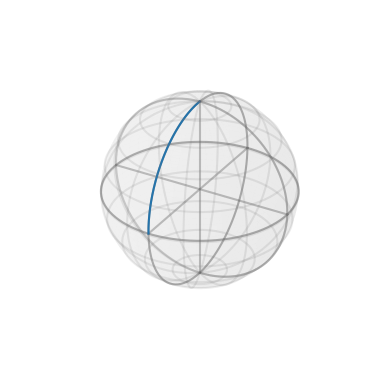

In [ ]:
%matplotlib inline

print(testResult.qubit.states[-1].getState("X"))
print(testResult.qubit.states[-1].getState("Y"))
print(testResult.qubit.states[-1].getState("Z"))
print(testResult.qubit.states[-1].getProbability("+X"))

testResult.plotProbability("+X")
testResult.plotProbability("+Y")
testResult.plotProbability("+Z")
testResult.plotBloch()

# Ramsey

## Sweep Guess

In [ ]:
guessResonances = np.linspace(-0.5, 0.5, 101).tolist()

In [ ]:
guessResult = qst.ramsey.sweepGuess(guessResonances, 1.5, 100, "Y")

100%|██████████| 101/101 [00:00<00:00, 210.87it/s]


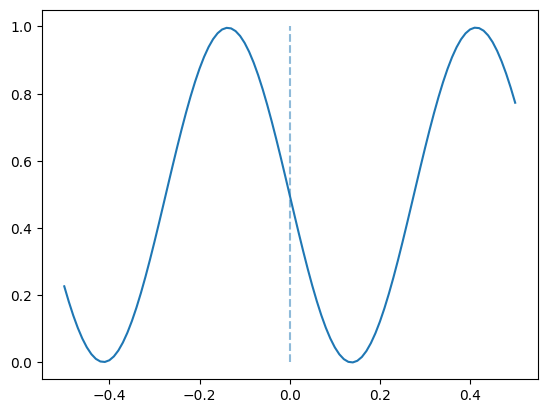

In [ ]:
plt.plot(guessResonances, guessResult)
plt.vlines([0], 0, 1, linestyles="--", alpha=0.5)
plt.show()

## Sweep Tau

In [ ]:
taus = np.linspace(0, 10, 101).tolist()

In [ ]:
tauResults = qst.ramsey.sweepTau(taus, 0.1)

100%|██████████| 101/101 [00:03<00:00, 33.54it/s]


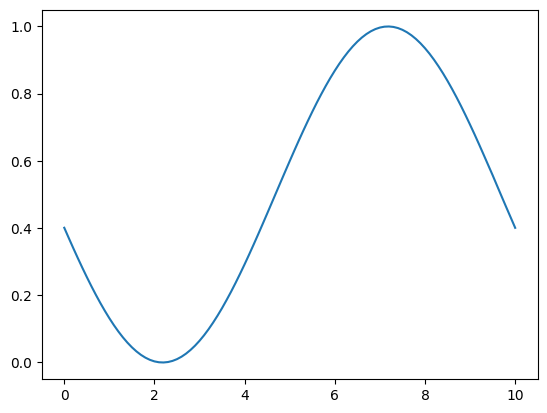

In [ ]:
plt.plot(taus, tauResults)
plt.show()

## Sweep Both

In [ ]:
guessResonances = np.linspace(-3, 3, 101).tolist()
taus = np.linspace(0, 2, 101).tolist()

In [ ]:
bothResultsX = qst.ramsey.sweepGuessAndTau(taus, guessResonances, numIterations=100)
bothResultsY = qst.ramsey.sweepGuessAndTau(taus, guessResonances, numIterations=100, secondGate="Y")

  0%|          | 0/101 [00:00<?, ?it/s]

100%|██████████| 101/101 [00:40<00:00,  2.49it/s]


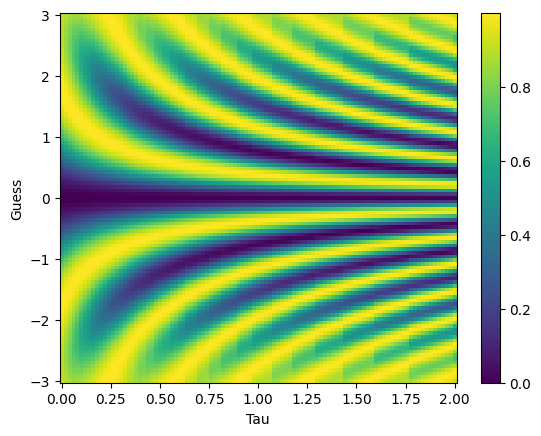

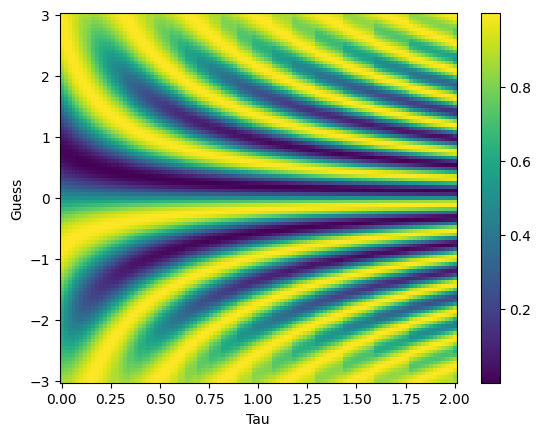

In [ ]:
X, Y = np.meshgrid(taus, guessResonances)
pcolorm = plt.pcolormesh(X, Y, bothResultsX, shading="nearest")
plt.colorbar(pcolorm)
plt.ylabel("Guess")
plt.xlabel("Tau")
plt.title("")
plt.show()

pcolorm = plt.pcolormesh(X, Y, bothResultsY, shading="nearest")
plt.colorbar(pcolorm)
plt.ylabel("Guess")
plt.xlabel("Tau")
plt.title("")
plt.show()